# Introduction

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Import Statements

In [1]:
import numpy as np
import pandas as pd
import cpi
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from iso3166 import countries
from datetime import datetime, timedelta, date

### Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [3]:
df_original = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [4]:
print(f'There are {df_original.shape[0]} rows and {df_original.shape[1]} columns in the dataset\n')
df_original.head()

There are 4324 rows and 9 columns in the dataset



Unnamed: 0  Unnamed: 0.1 Organisation  \
0           0             0       SpaceX   
1           1             1         CASC   
2           2             2       SpaceX   
3           3             3    Roscosmos   
4           4             4          ULA   

                                            Location  \
0         LC-39A, Kennedy Space Center, Florida, USA   
1  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2                      Pad A, Boca Chica, Texas, USA   
3       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4           SLC-41, Cape Canaveral AFS, Florida, USA   

                         Date                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  Thu Jul 30, 2020 11:50 UTC                    Atlas V 541 | Perseverance   

  Rocket_Status  Price Mission_Status  
0  StatusActive   50.0        Success  
1  StatusActive  29.75        Success  
2  StatusActive    NaN        Success  
3  StatusActive   65.0        Success  
4  StatusActive  145.0        Success

In [5]:
print(f'There are {len(df_original[df_original.duplicated()])} duplicated columns\n')
df_original.info()

There are 0 duplicated columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4324 non-null   int64 
 1   Unnamed: 0.1    4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [6]:
# Remove first two columns
df = df_original[df_original.columns[2:]]

In [7]:
# Add column for inflation-adjusted price (in dollars of most-recent date)
def convert_date(raw_date):
    try:
        converted_date = datetime.strptime(raw_date, '%a %b %d, %Y %H:%M UTC')
    except ValueError:
        converted_date = datetime.strptime(raw_date, '%a %b %d, %Y')
    return converted_date

def convert_price(raw_price):
    if type(raw_price) is str:
        raw_price = raw_price.replace(',', '')
    converted_price = float(raw_price)
    return converted_price

max_datetime = max([convert_date(d) for d in df['Date']])
max_date = date(max_datetime.year, max_datetime.month, max_datetime.day)

real_price_list = []
for idx, row in df.iterrows():
    input_date = convert_date(row['Date'])
    input_price = convert_price(row['Price'])
    real_price = cpi.inflate(input_price, input_date, to=max_date)
    real_price_list.append(round(real_price, 2))

df['Real_Price'] = real_price_list

# Cast columns as appropriate datatypes
df['Price'] = [convert_price(p) for p in df['Price']]
df['Date'] = [convert_date(d) for d in df['Date']]

/Users/mymac/PycharmProjects/100DaysOfCode/venv/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mymac/PycharmProjects/100DaysOfCode/venv/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mymac/PycharmProjects/100DaysOfCode/venv/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [8]:
df

Organisation                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                    Date                                        Detail  \
0    2020-08-07 05:12:00  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1    2020-08-06 04:01:00           Long March 2D | Gaofen-9 04 & Q-SAT   
2    2020-08-04 23:57:00            Starship Prototype | 150 Meter Hop   
3    2020-07-30 21:25:00  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4    2020-07-30 11:50:00                    Atlas V 541 | Perseverance   
...                  ...                                           ...   
4319 1958-02-05 07:33:00                     Vanguard | Vanguard TV3BU   
4320 1958-02-01 03:48:00                           Juno I | Explorer 1   
4321 1957-12-06 16:44:00                       Vanguard | Vanguard TV3   
4322 1957-11-03 02:30:00                    Sputnik 8K71PS | Sputnik-2   
4323 1957-10-04 19:28:00                    Sputnik 8K71PS | Sputnik-1   

      Rocket_Status  Price Mission_Status  Real_Price  
0      StatusActive  50.00        Success       50.00  
1      StatusActive  29.75        Success       29.75  
2      StatusActive    NaN        Success         NaN  
3      StatusActive  65.00        Success       65.20  
4      StatusActive 145.00        Success      145.46  
...             ...    ...            ...         ...  
4319  StatusRetired    NaN        Failure         NaN  
4320  StatusRetired    NaN        Success         NaN  
4321  StatusRetired    NaN        Failure         NaN  
4322  StatusRetired    NaN        Success         NaN  
4323  StatusRetired    NaN        Success         NaN  

[4324 rows x 8 columns]

## Descriptive Statistics

In [9]:
df.describe()

Price  Real_Price
count   964.00      964.00
mean    153.79      329.54
std     288.45    1,057.01
min       5.30        5.37
25%      40.00       49.08
50%      62.00       69.80
75%     164.00      219.78
max   5,000.00   11,490.63

In [10]:
df_orgs = df.value_counts('Organisation')
df_locations = df.value_counts('Location')

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

<BarContainer object of 10 artists>

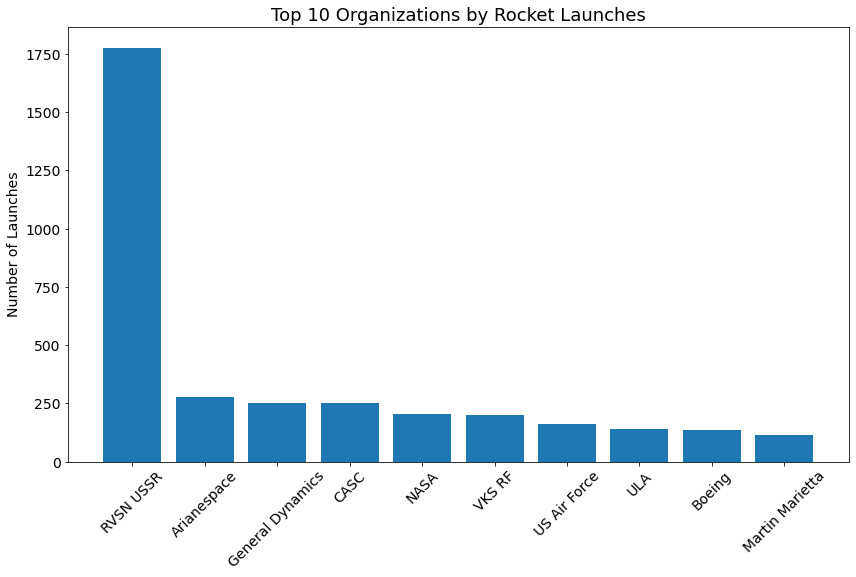

In [11]:
plt.figure(figsize=(14,8))
plt.title('Top 10 Organizations by Rocket Launches', fontsize=18)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
# plt.xlabel('Organization', fontsize=14)
plt.ylabel('Number of Launches', fontsize=14)

plt.bar(df_orgs.index[0:10], df_orgs.values[0:10])

<BarContainer object of 10 artists>

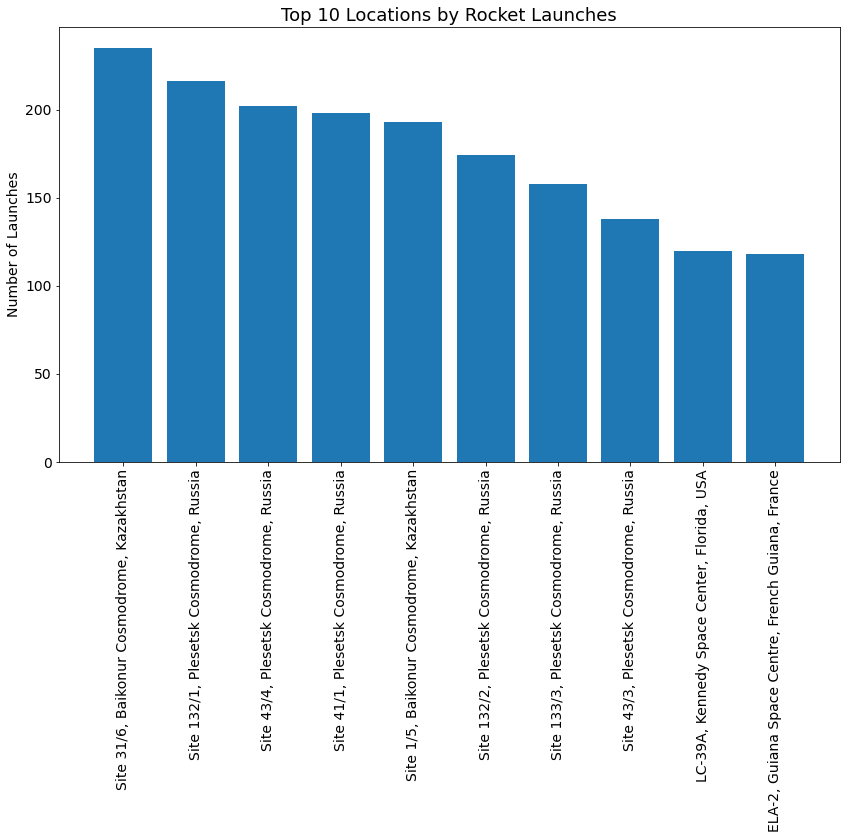

In [12]:
plt.figure(figsize=(14,8))
plt.title('Top 10 Locations by Rocket Launches', fontsize=18)

plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
# plt.xlabel('Locations', fontsize=14)
plt.ylabel('Number of Launches', fontsize=14)

plt.bar(df_locations.index[0:10], df_locations.values[0:10])

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [13]:
df_rockets = df.value_counts('Rocket_Status')
df_rockets

Rocket_Status
StatusRetired    3534
StatusActive      790
dtype: int64

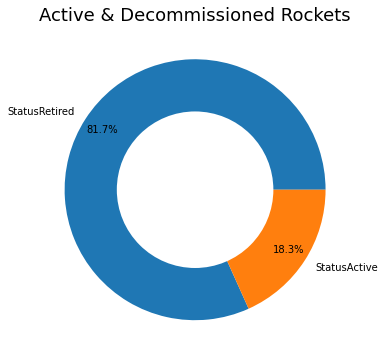

In [14]:
# Set figure size
plt.figure(figsize=(6,6))

# Pie Chart
plt.pie(df_rockets.values, labels=df_rockets.index, autopct='%1.1f%%', pctdistance=0.85)

# draw circle
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Format and display chart
plt.title('Active & Decommissioned Rockets', fontsize=18)
plt.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [15]:
df_success = df.value_counts('Mission_Status')
df_success

Mission_Status
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
dtype: int64

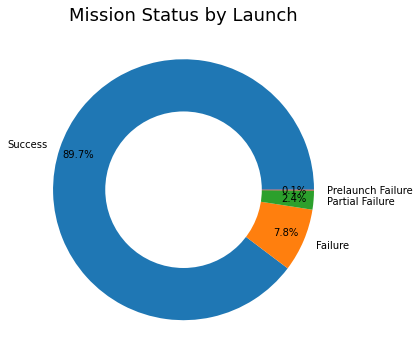

In [16]:
plt.figure(figsize=(6, 6))

# Pie Chart
plt.pie(df_success.values, labels=df_success.index, autopct='%1.1f%%', pctdistance=0.85)

# draw circle
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Format and display chart
plt.title('Mission Status by Launch', fontsize=18)
plt.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [17]:
# Missing Prices
df['Price'].isna().value_counts()

True     3360
False     964
Name: Price, dtype: int64

In [18]:
df[['Date', 'Price', 'Real_Price']].sort_values(by='Real_Price', ascending=False)

Date    Price  Real_Price
2000 1987-05-15 17:30:00 5,000.00   11,490.63
1916 1988-11-15 03:00:00 5,000.00   10,802.91
3716 1967-11-09 12:00:00 1,160.00    8,920.26
3683 1968-04-04 12:00:00 1,160.00    8,764.68
3603 1968-12-21 12:51:00 1,160.00    8,493.10
...                  ...      ...         ...
4319 1958-02-05 07:33:00      NaN         NaN
4320 1958-02-01 03:48:00      NaN         NaN
4321 1957-12-06 16:44:00      NaN         NaN
4322 1957-11-03 02:30:00      NaN         NaN
4323 1957-10-04 19:28:00      NaN         NaN

[4324 rows x 3 columns]

Text(0.5, 0.98, 'Histograms of Nominal Prices (left) and Real Prices (Right) in millions of USD')

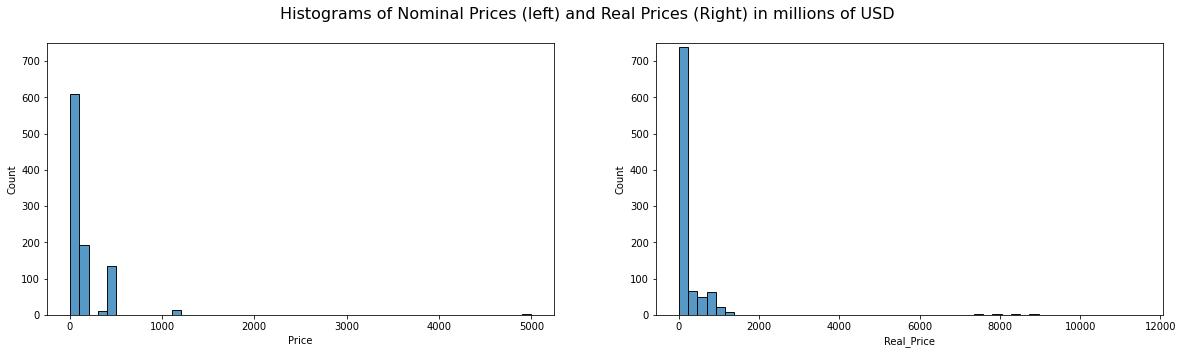

In [19]:
# Plot two histograms side-by-side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,5))
sns.histplot(data=df, x=df['Price'], bins=50, ax=ax1)
sns.histplot(data=df, x=df['Real_Price'], bins=50, ax=ax2)

# Assign the same y lim to each subplot
ax1.set_ylim([0, 750])
ax2.set_ylim([0, 750])

fig.suptitle('Histograms of Nominal Prices (left) and Real Prices (Right) in millions of USD', fontsize=16)

Text(0.5, 0.98, 'Histograms of Nominal Prices (left) and Real Prices (Right) in millions of USD (outliers removed)')

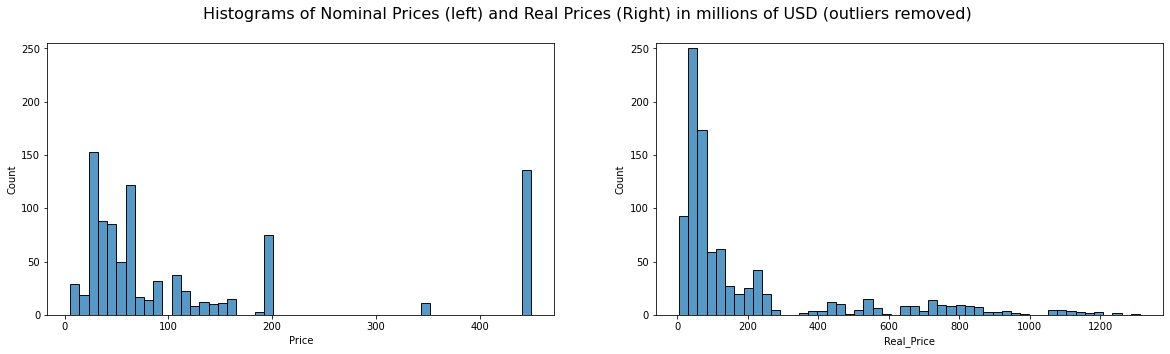

In [20]:
# Remove Outliers
df_without_outliers = df[df['Real_Price'] < 5000]

# Plot two histograms side-by-side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,5))
sns.histplot(data=df_without_outliers, x=df_without_outliers['Price'], bins=50, ax=ax1)
sns.histplot(data=df_without_outliers, x=df_without_outliers['Real_Price'], bins=50, ax=ax2)

# Assign the same y lim to each subplot
ax1.set_ylim([0, 255])
ax2.set_ylim([0, 255])

fig.suptitle('Histograms of Nominal Prices (left) and Real Prices (Right) in millions of USD (outliers removed)', fontsize=16)

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [21]:
# Define dictionary of places to rename
country_dict = {
    'Russia': 'Russian Federation',
    'Pacific Ocean': 'Russian Federation',
    'Barents Sea': 'Russian Federation',
    'Iran': 'Iran, Islamic Republic of',
    'Shahrud Missile Test Site': 'Iran, Islamic Republic of',
    'New Mexico': 'USA',
    'Yellow Sea': 'China',
    'North Korea': 'Korea, Democratic People\'s Republic of',
    'South Korea': 'Korea, Republic of',
    'Pacific Missile Range Facility': 'USA',
    'Gran Canaria': 'USA'
}

def where_in_the_world_is_carmen_sandiego(location, year):
    # Clean location
    last_part = location.split(',')[-1]
    cleaned_loc = last_part.strip()

    # Get ISO code from country name
    try:
        iso = countries.get(cleaned_loc)

    # If no result, run it through country dictionary first
    except KeyError:
        # Launches on the Kiritimati (Christmas) Island in the Pacific Ocean were conducted by the multinational org Sea Launch
        # In 2010 they switched from being plurality owned by the US to being majority owned by Russia
        if cleaned_loc == 'Pacific Ocean':
            if year <= 2010:
                official_name = 'USA'
            elif year > 2010:
                official_name = 'Russian Federation'
            iso_country = countries.get(official_name)

        else:
            official_name = country_dict[cleaned_loc]
            iso_country = countries.get(official_name)

    return iso_country.alpha3

# Add results as an ISO column to the dataframe
iso_list = []
for idx, row in df.iterrows():
    launch_year = row['Date'].year
    launch_location = df.iloc[idx]['Location']
    iso = where_in_the_world_is_carmen_sandiego(launch_location, launch_year)
    iso_list.append(iso)

df['ISO'] = iso_list

# Use a Choropleth Map to Show the Number of Failures by Country


In [22]:
# Map the number of launch failures by country
df_fails = df[df['Mission_Status'] == 'Failure'].value_counts('ISO')

fig = px.choropleth(df_fails,
                    locations=df_fails.index,
                    locationmode="ISO-3",
                    color=df_fails.values,
                    color_continuous_scale=px.colors.sequential.matter
                    )
fig.update_geos(projection_type="natural earth")
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [45]:
# Group by Country, Organisation, Mission Status
df_mission = df.groupby(['ISO', 'Organisation', 'Mission_Status']).count()
df_mission = df_mission[['Location']].rename(columns={'Location':'Count'})
df_mission = df_mission.reset_index()
df_mission

ISO  Organisation   Mission_Status  Count
0    AUS          AMBA          Success      1
1    AUS        CECLES          Failure      2
2    AUS        CECLES          Success      1
3    AUS           RAE          Failure      1
4    AUS           RAE          Success      1
..   ...           ...              ...    ...
129  USA  US Air Force          Success    129
130  USA       US Navy          Failure     14
131  USA       US Navy  Partial Failure      1
132  USA       US Navy          Success      2
133  USA  Virgin Orbit          Failure      1

[134 rows x 4 columns]

In [38]:
burst_mission = px.sunburst(df_mission,
                  path=['ISO', 'Organisation', 'Mission_Status'],
                  values='Count',
                  title='Maybe in this instance we should not call it a sunburst plot...')
burst_mission

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [47]:
# Group by Country, Organisation, Mission Status
df_spending = df.groupby(['ISO', 'Organisation']).sum()
df_spending = df_spending['Real_Price']
df_spending = df_spending.reset_index()
df_spending = df_spending.sort_values(by='Real_Price', ascending=False)
df_spending

ISO  Organisation  Real_Price
57  USA          NASA  212,516.63
28  KAZ     RVSN USSR   22,293.54
10  FRA   Arianespace   18,674.85
62  USA           ULA   16,561.24
63  USA  US Air Force   11,946.80
..  ...           ...         ...
32  KAZ      Yuzhmash        0.00
1   AUS        CECLES        0.00
34  KOR          KARI        0.00
36  PRK          KCST        0.00
33  KEN           ASI        0.00

[66 rows x 3 columns]

In [48]:
"""
CAUTION! There are a lot of mission data points here
"""
burst_spending = px.sunburst(df_spending,
                  path=['ISO', 'Organisation'],
                  values='Real_Price',
                  title='Inflation-Adjusted Known Spending by Country and Organization (million USD)')
burst_spending

<BarContainer object of 10 artists>

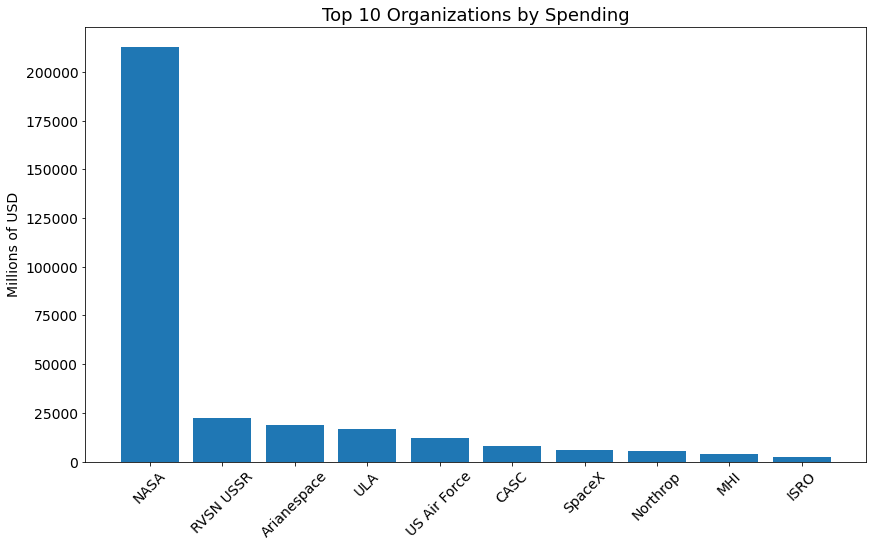

In [50]:
# Add a bar plot for fun
plt.figure(figsize=(14,8))
plt.title('Top 10 Organizations by Spending', fontsize=18)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
# plt.xlabel('Organization', fontsize=14)
plt.ylabel('Millions of USD', fontsize=14)

plt.bar(df_spending['Organisation'][0:10], df_spending['Real_Price'][0:10])

# Analyse the Amount of Money Spent by Organisation per Launch

In [75]:
# Recount after excluding missing prices
df_counts_w_price = df.groupby(['ISO', 'Organisation']).count()
df_counts_w_price = df_counts_w_price[['Price']].reset_index()
df_counts_w_price = df_counts_w_price.sort_values(by='Price', ascending=False)
df_counts_w_price

ISO Organisation  Price
4   CHN         CASC    158
57  USA         NASA    149
61  USA       SpaceX     99
62  USA          ULA     98
10  FRA  Arianespace     94
..  ...          ...    ...
32  KAZ     Yuzhmash      0
1   AUS       CECLES      0
34  KOR         KARI      0
36  PRK         KCST      0
33  KEN          ASI      0

[66 rows x 3 columns]

In [78]:
# Add Average Real Spending column
df_avg_spend = df_spending.merge(df_counts_w_price, how='outer', on=['ISO', 'Organisation'])
df_avg_spend = df_avg_spend.rename(columns={'Price':'Count', 'Real_Price':'Real_Spending'})
df_avg_spend['Avg_Real_Spend'] = df_avg_spend['Real_Spending']/df_avg_spend['Count']
df_avg_spend = df_avg_spend.sort_values(by='Avg_Real_Spend', ascending=False)
df_avg_spend

ISO  Organisation  Real_Spending  Count  Avg_Real_Spend
1   KAZ     RVSN USSR      22,293.54      2       11,146.77
0   USA          NASA     212,516.63    149        1,426.29
4   USA  US Air Force      11,946.80     26          459.49
10  USA        Boeing       1,680.24      7          240.03
2   FRA   Arianespace      18,674.85     94          198.67
..  ...           ...            ...    ...             ...
61  KAZ      Yuzhmash           0.00      0             NaN
62  AUS        CECLES           0.00      0             NaN
63  KOR          KARI           0.00      0             NaN
64  PRK          KCST           0.00      0             NaN
65  KEN           ASI           0.00      0             NaN

[66 rows x 5 columns]

<BarContainer object of 10 artists>

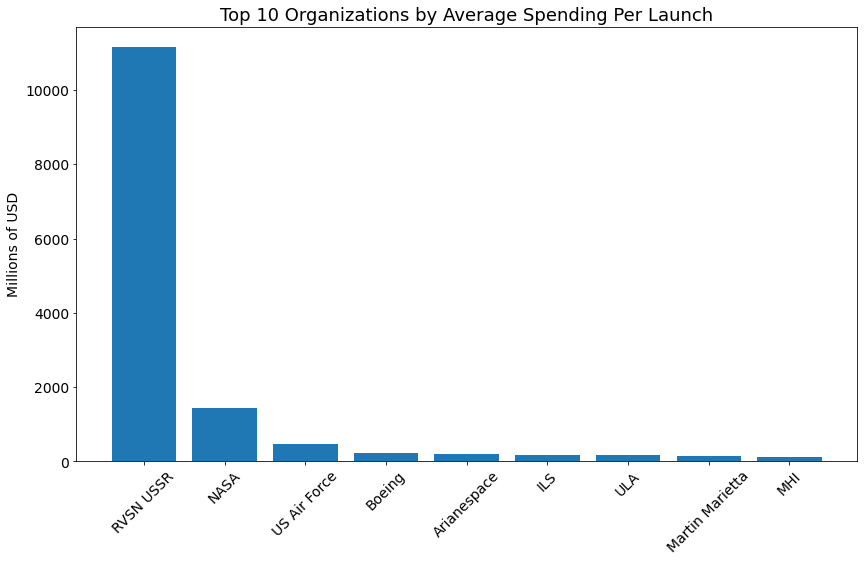

In [80]:
plt.figure(figsize=(14,8))
plt.title('Top 10 Organizations by Average Spending Per Launch', fontsize=18)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Millions of USD', fontsize=14)

plt.bar(df_avg_spend['Organisation'][0:10], df_avg_spend['Avg_Real_Spend'][0:10])

# Chart the Number of Launches per Year

In [160]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

df_monthly_count = df.groupby(['Year', 'Month']).count()
df_monthly_count = df_monthly_count[['Date']].rename(columns={'Date':'Count'})
df_monthly_count

Count
Year Month       
1957 10         1
     11         1
     12         1
1958 2          2
     3          3
...           ...
2020 4          5
     5          9
     6          7
     7         14
     8          3

[747 rows x 1 columns]

<BarContainer object of 64 artists>

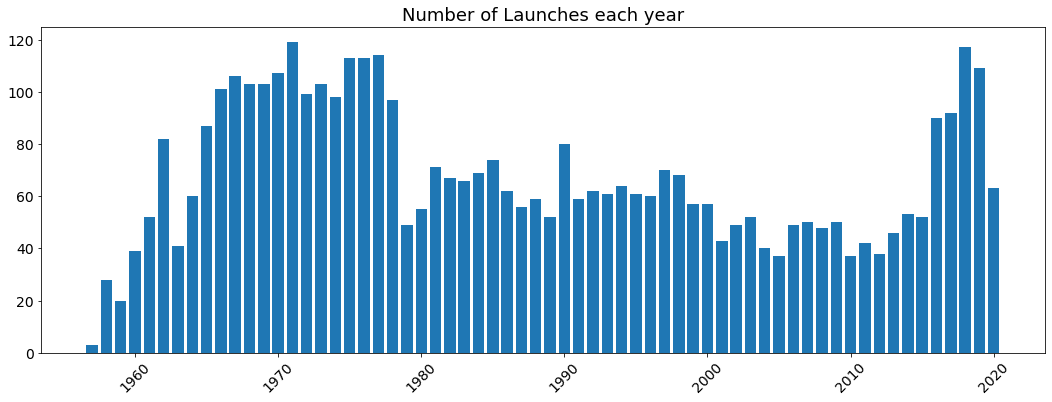

In [161]:
df_annual_count = df_monthly_count.groupby('Year').sum('Count')

plt.figure(figsize=(18,6))
plt.title('Number of Launches each year', fontsize=18)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.bar(df_annual_count.index, df_annual_count['Count'])

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [164]:
df_monthly_roll = df_monthly_count.rolling(window=6).mean()
df_monthly_roll = df_monthly_roll.rename(columns={'Count': 'MA_Count'})

df_monthly = df_monthly_count
df_monthly['MA_Count'] = df_monthly_roll['MA_Count']
df_monthly['Date'] = [date(year, month, 15) for year, month in df_monthly.index]
df_monthly

Count  MA_Count        Date
Year Month                             
1957 10         1       NaN  1957-10-15
     11         1       NaN  1957-11-15
     12         1       NaN  1957-12-15
1958 2          2       NaN  1958-02-15
     3          3       NaN  1958-03-15
...           ...       ...         ...
2020 4          5      9.67  2020-04-15
     5          9      9.17  2020-05-15
     6          7      7.67  2020-06-15
     7         14      8.67  2020-07-15
     8          3      7.67  2020-08-15

[747 rows x 3 columns]

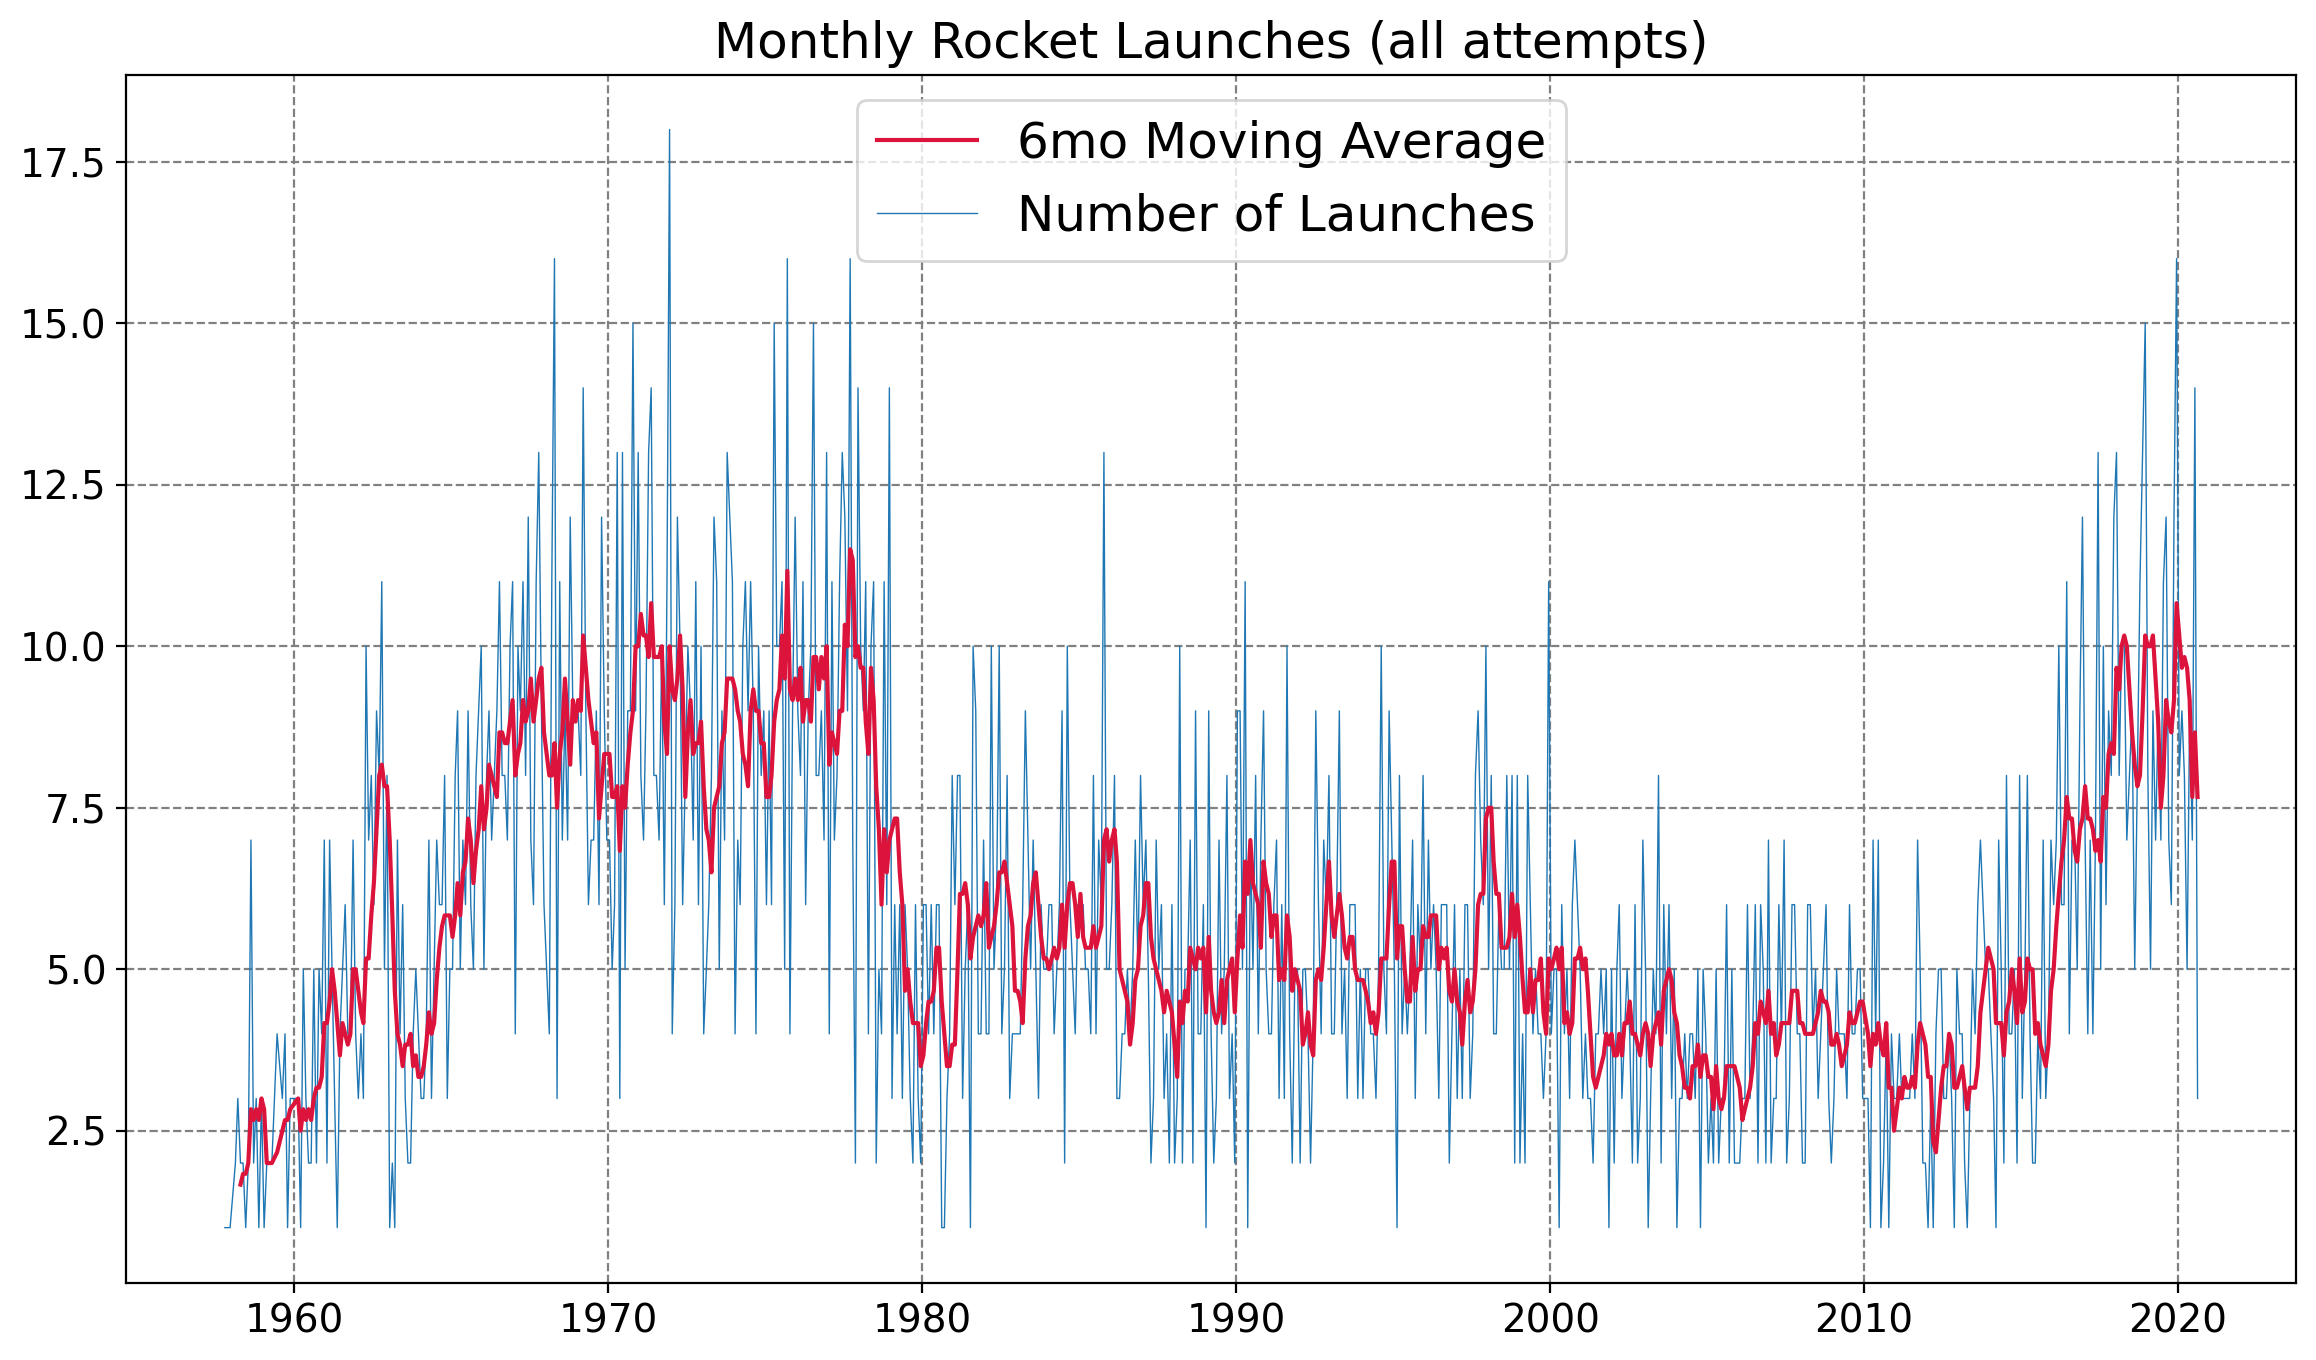

In [165]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Monthly Rocket Launches (all attempts)', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.grid(color='grey', linestyle='--')

bw_line, = plt.plot(df_monthly['Date'],
                    df_monthly['Count'],
                    linewidth=0.5,
                    label='Number of Launches')

ma_line, = plt.plot(df_monthly['Date'],
                    df_monthly['MA_Count'],
                    color='crimson',
                    label='6mo Moving Average')

plt.legend(handles=[ma_line, bw_line], fontsize=18)

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [193]:
df_month = df_monthly.reset_index()
df_month = df_month.groupby('Month').sum()
df_month = df_month[['Count']]
df_month['Month_Name'] = [datetime.strptime(str(month_num), "%m").strftime("%b") for month_num in df_month.index]
df_month

Count Month_Name
Month                  
1        268        Jan
2        336        Feb
3        353        Mar
4        383        Apr
5        326        May
6        402        Jun
7        351        Jul
8        373        Aug
9        365        Sep
10       381        Oct
11       336        Nov
12       450        Dec

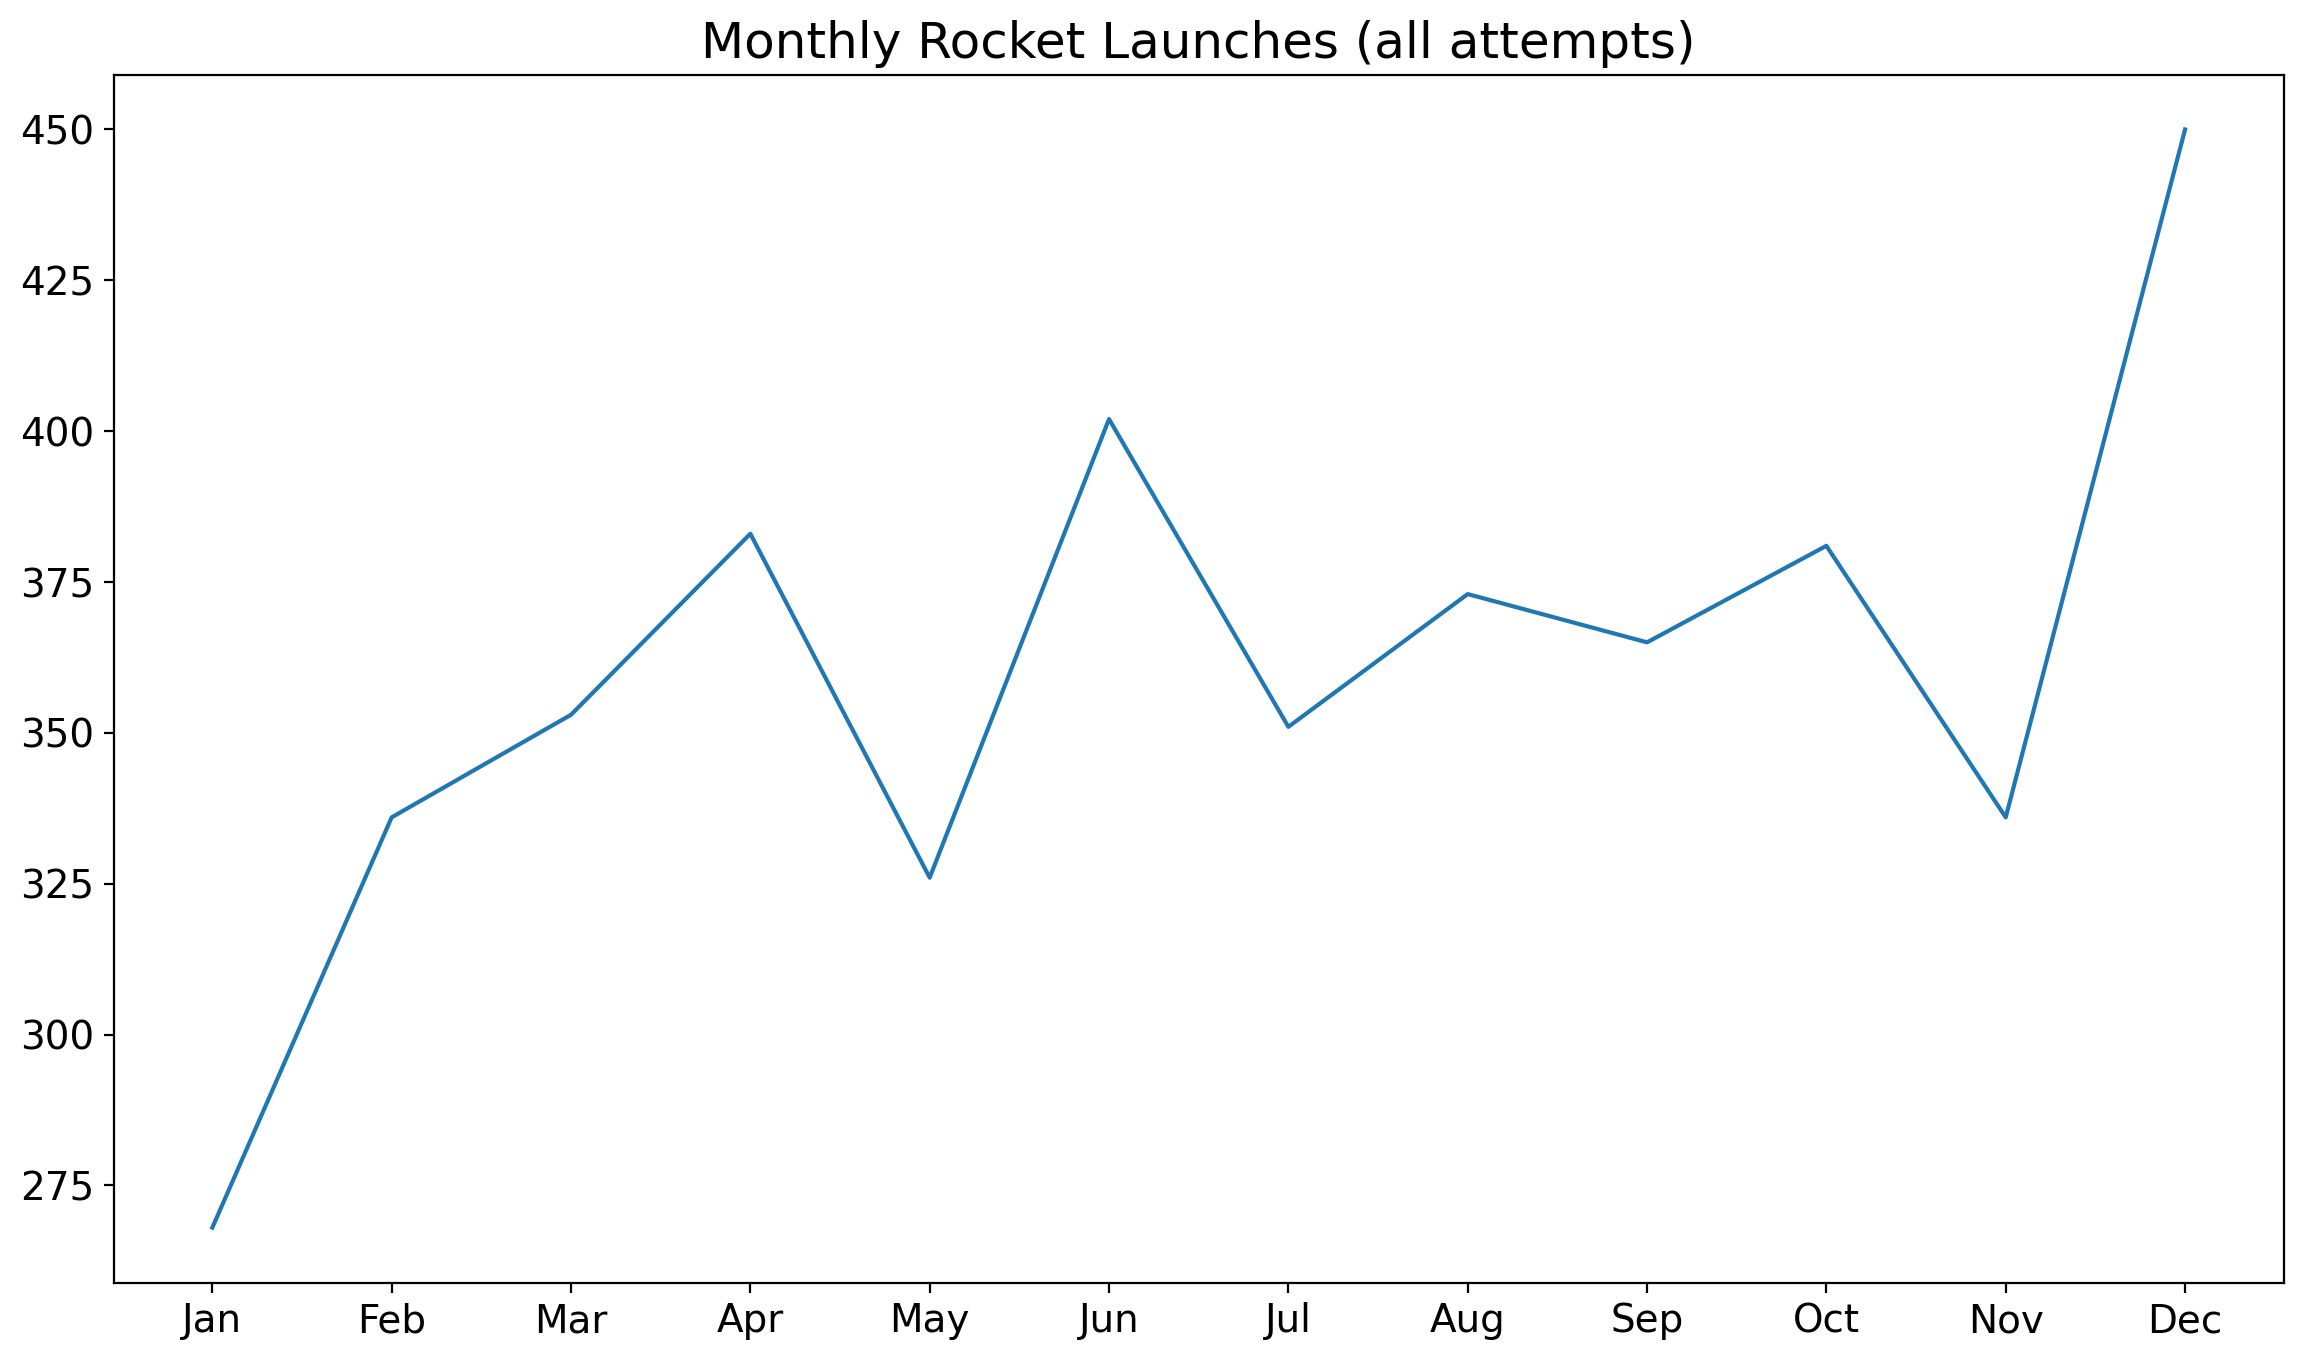

In [194]:

plt.figure(figsize=(14,8), dpi=200)
plt.title('Monthly Rocket Launches (all attempts)', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

bw_line, = plt.plot(df_month['Month_Name'],
                    df_month['Count'],
                    label='Number of Launches')

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [212]:
df_monthly_price = df.dropna(subset=['Real_Price'])
df_monthly_price = df_monthly_price.groupby(['Year']).mean()
# df_monthly_price = df_monthly_price['Real_Price']
df_monthly_price

Price  Real_Price  Month
Year                            
1964    63.23      527.60  10.50
1965    63.23      525.08   3.50
1966    59.00      468.98   9.33
1967   196.62    1,516.47   7.75
1968   279.20    2,078.38   6.90
1969   609.50    4,320.66   5.00
1970 1,160.00    7,831.30   4.00
1971 1,160.00    7,491.74   4.00
1972 1,160.00    7,179.70   8.00
1973 1,160.00    6,867.99   5.00
1981   450.00    1,280.49   7.50
1982   345.20      929.69   7.25
1983   366.16      951.78   7.60
1984   380.13      948.95   7.33
1985   408.08      984.37   7.30
1986   310.27      735.65   4.00
1987 1,687.20    3,876.74   7.33
1988 1,193.16    2,578.62   9.80
1989   380.83      795.48   7.67
1990   289.15      575.65   5.82
1991   391.43      746.30   7.00
1992   319.35      591.27   7.00
1993   276.73      497.73   6.75
1994   221.51      388.30   6.19
1995   325.00      553.79   6.80
1996   243.20      404.10   6.07
1997   221.74      359.29   7.11
1998   152.12      242.55   6.83
1999   128.51      199.98   7.43
2000   173.12      260.81   6.88
2001   290.70      427.32   6.70
2002   185.59      267.51   7.65
2003    80.51      114.12   6.70
2004    92.74      127.02   8.59
2005    95.79      127.48   6.80
2006   138.61      178.19   7.26
2007   125.70      156.93   6.17
2008   129.75      157.10   6.68
2009   180.29      218.19   6.74
2010   148.40      176.83   6.97
2011   146.60      169.65   6.07
2012   122.29      138.27   7.24
2013    90.55      100.97   7.00
2014   102.55      112.72   6.68
2015    91.55      100.36   6.49
2016    79.46       86.01   6.61
2017    69.49       73.62   7.32
2018    64.75       67.04   6.60
2019    59.61       60.58   7.16
2020    56.65       57.03   4.40

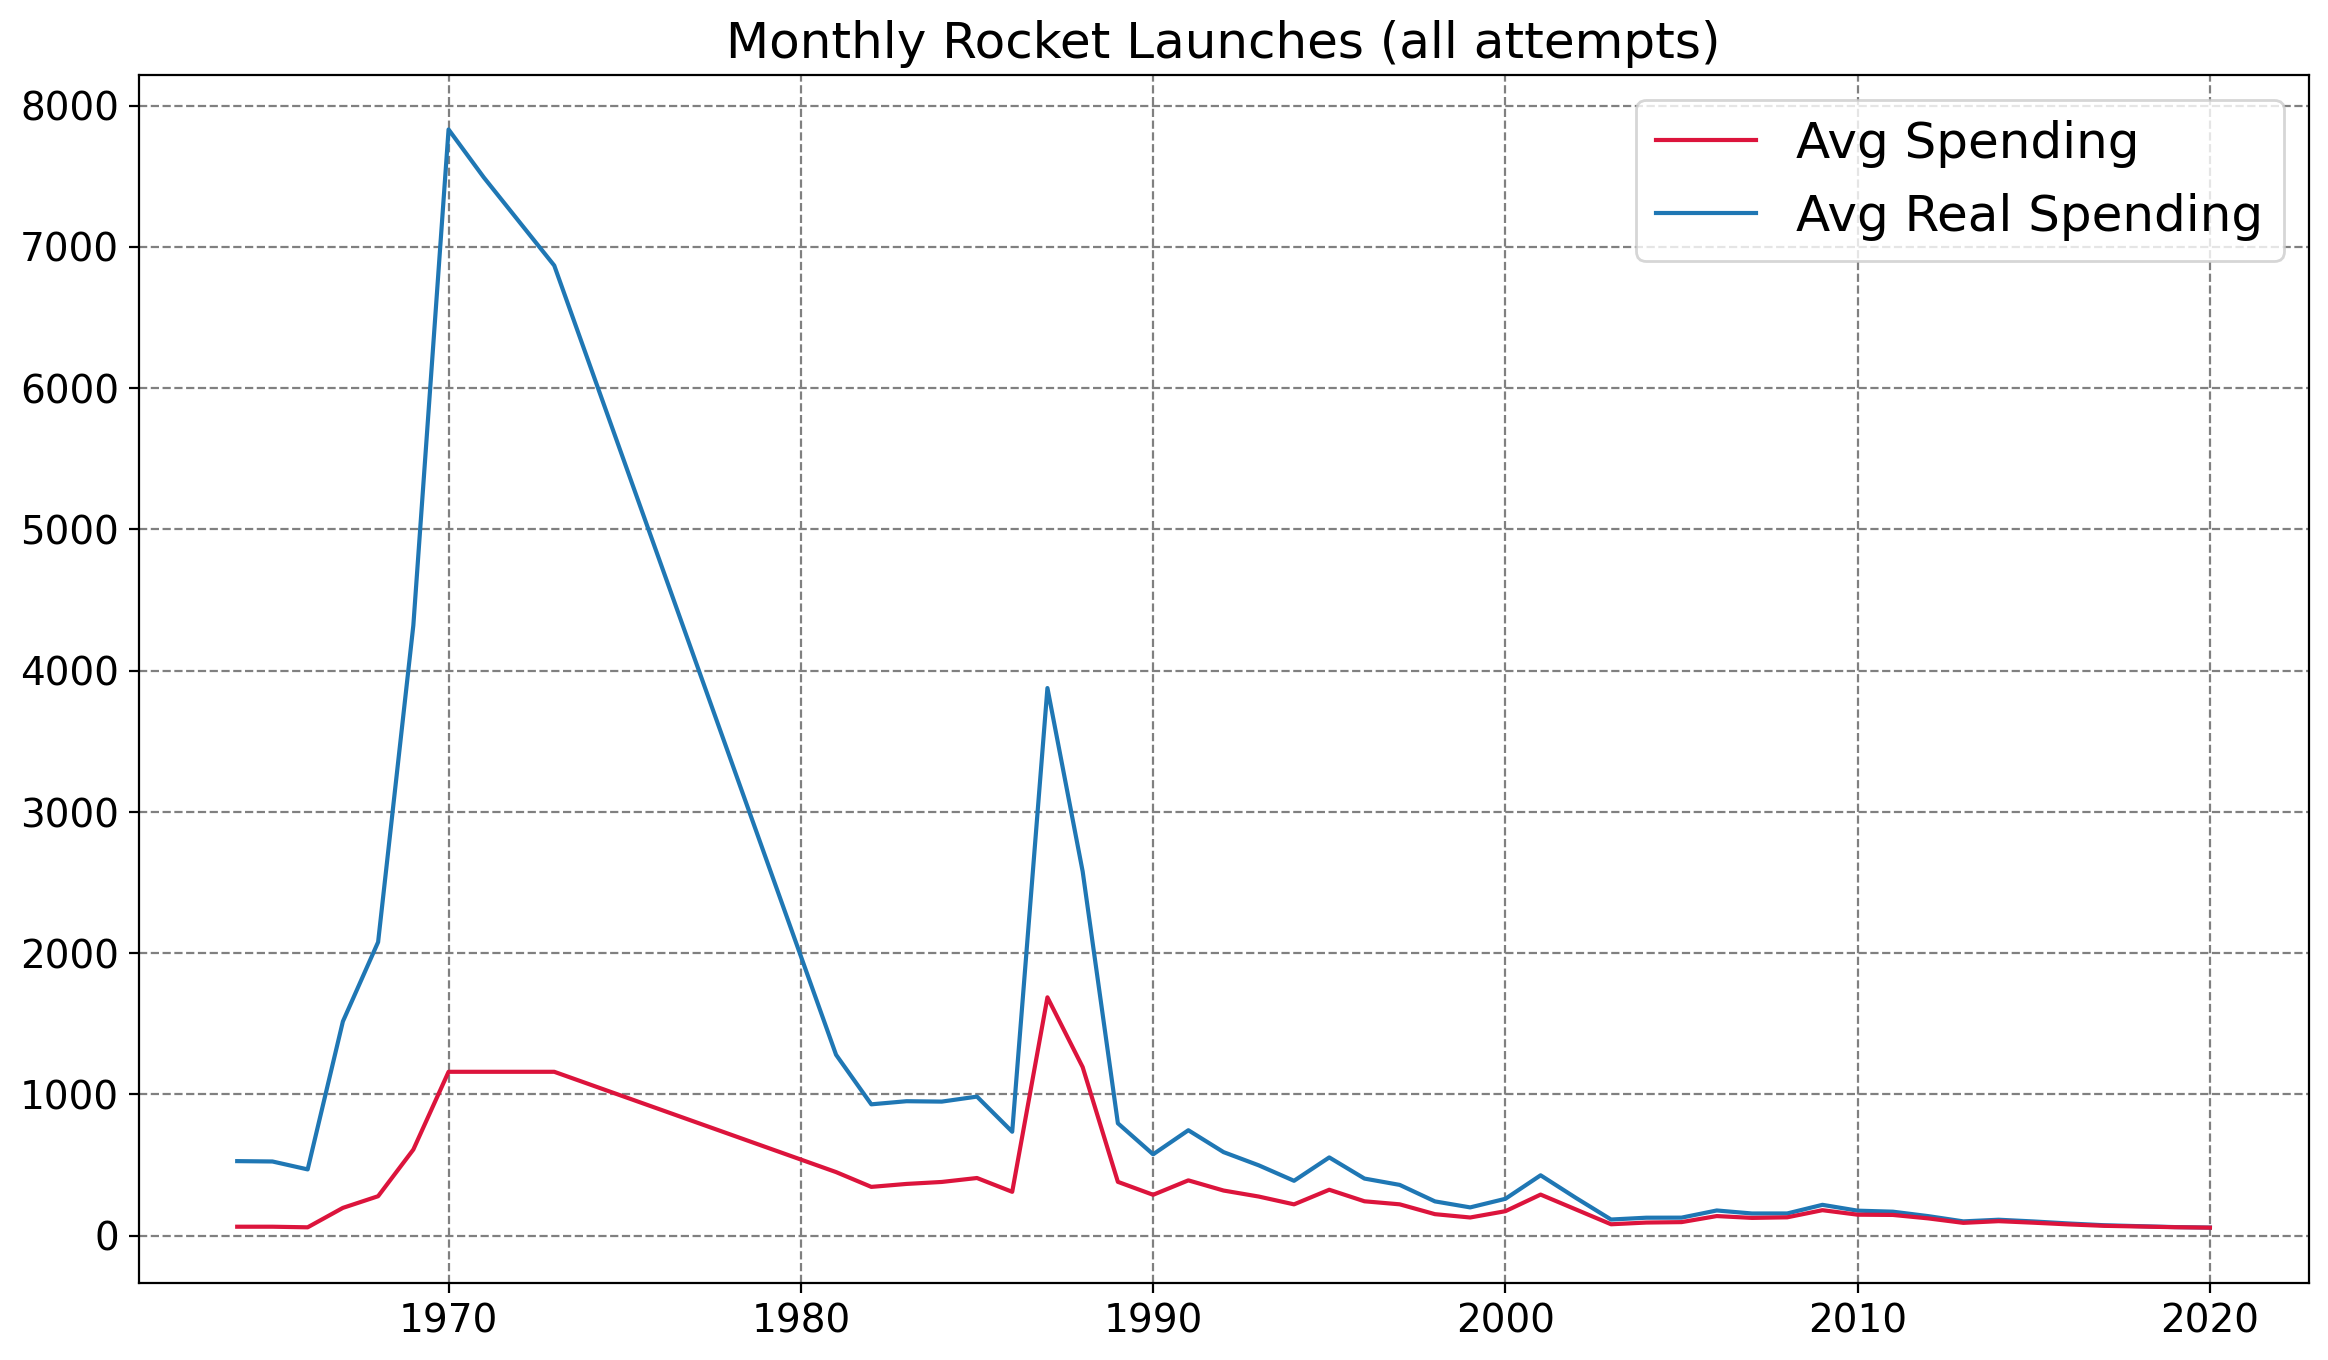

In [215]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Monthly Spending by Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.grid(color='grey', linestyle='--')

bw_line, = plt.plot(df_monthly_price.index,
                    df_monthly_price['Real_Price'],
                    label='Avg Real Spending')

ma_line, = plt.plot(df_monthly_price.index,
                    df_monthly_price['Price'],
                    color='crimson',
                    label='Avg Spending')

plt.legend(handles=[ma_line, bw_line], fontsize=18)

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [273]:
# Find Top 10 Orgs to Filter
df_count_by_org = df.groupby('Organisation').count()[['Location']]
df_count_by_org = df_count_by_org.sort_values('Location', ascending=False)
top_orgs = df_count_by_org[0:10].index

# Group Top 10 over time
df_annual_count_by_org = df[df['Organisation'].isin(top_orgs)]
df_annual_count_by_org = df.groupby(['Year', 'Organisation']).count()
df_annual_count_by_org = df_annual_count_by_org[['Location']].rename(columns={'Location':'Count'})
df_annual_count_by_org = df_annual_count_by_org.reset_index()
df_annual_count_by_org

Year  Organisation  Count
0    1957     RVSN USSR      2
1    1957       US Navy      1
2    1958          AMBA      7
3    1958          NASA      2
4    1958     RVSN USSR      5
..    ...           ...    ...
658  2020     Roscosmos      4
659  2020        SpaceX     14
660  2020           ULA      4
661  2020        VKS RF      3
662  2020  Virgin Orbit      1

[663 rows x 3 columns]

In [259]:
# Fill in missing values for years when an org had zero launches
# pip install pyjanitor
import janitor
df_annual_count_by_org = df_annual_count_by_org.complete(('Organisation'), 'Year')
df_annual_count_by_org = df_annual_count_by_org.fillna(0)
df_annual_count_by_org

Year  Organisation  Count
0     1957     RVSN USSR   2.00
1     1958     RVSN USSR   5.00
2     1959     RVSN USSR   4.00
3     1960     RVSN USSR   9.00
4     1961     RVSN USSR   9.00
...    ...           ...    ...
3579  2016  Virgin Orbit   0.00
3580  2017  Virgin Orbit   0.00
3581  2018  Virgin Orbit   0.00
3582  2019  Virgin Orbit   0.00
3583  2020  Virgin Orbit   1.00

[3584 rows x 3 columns]

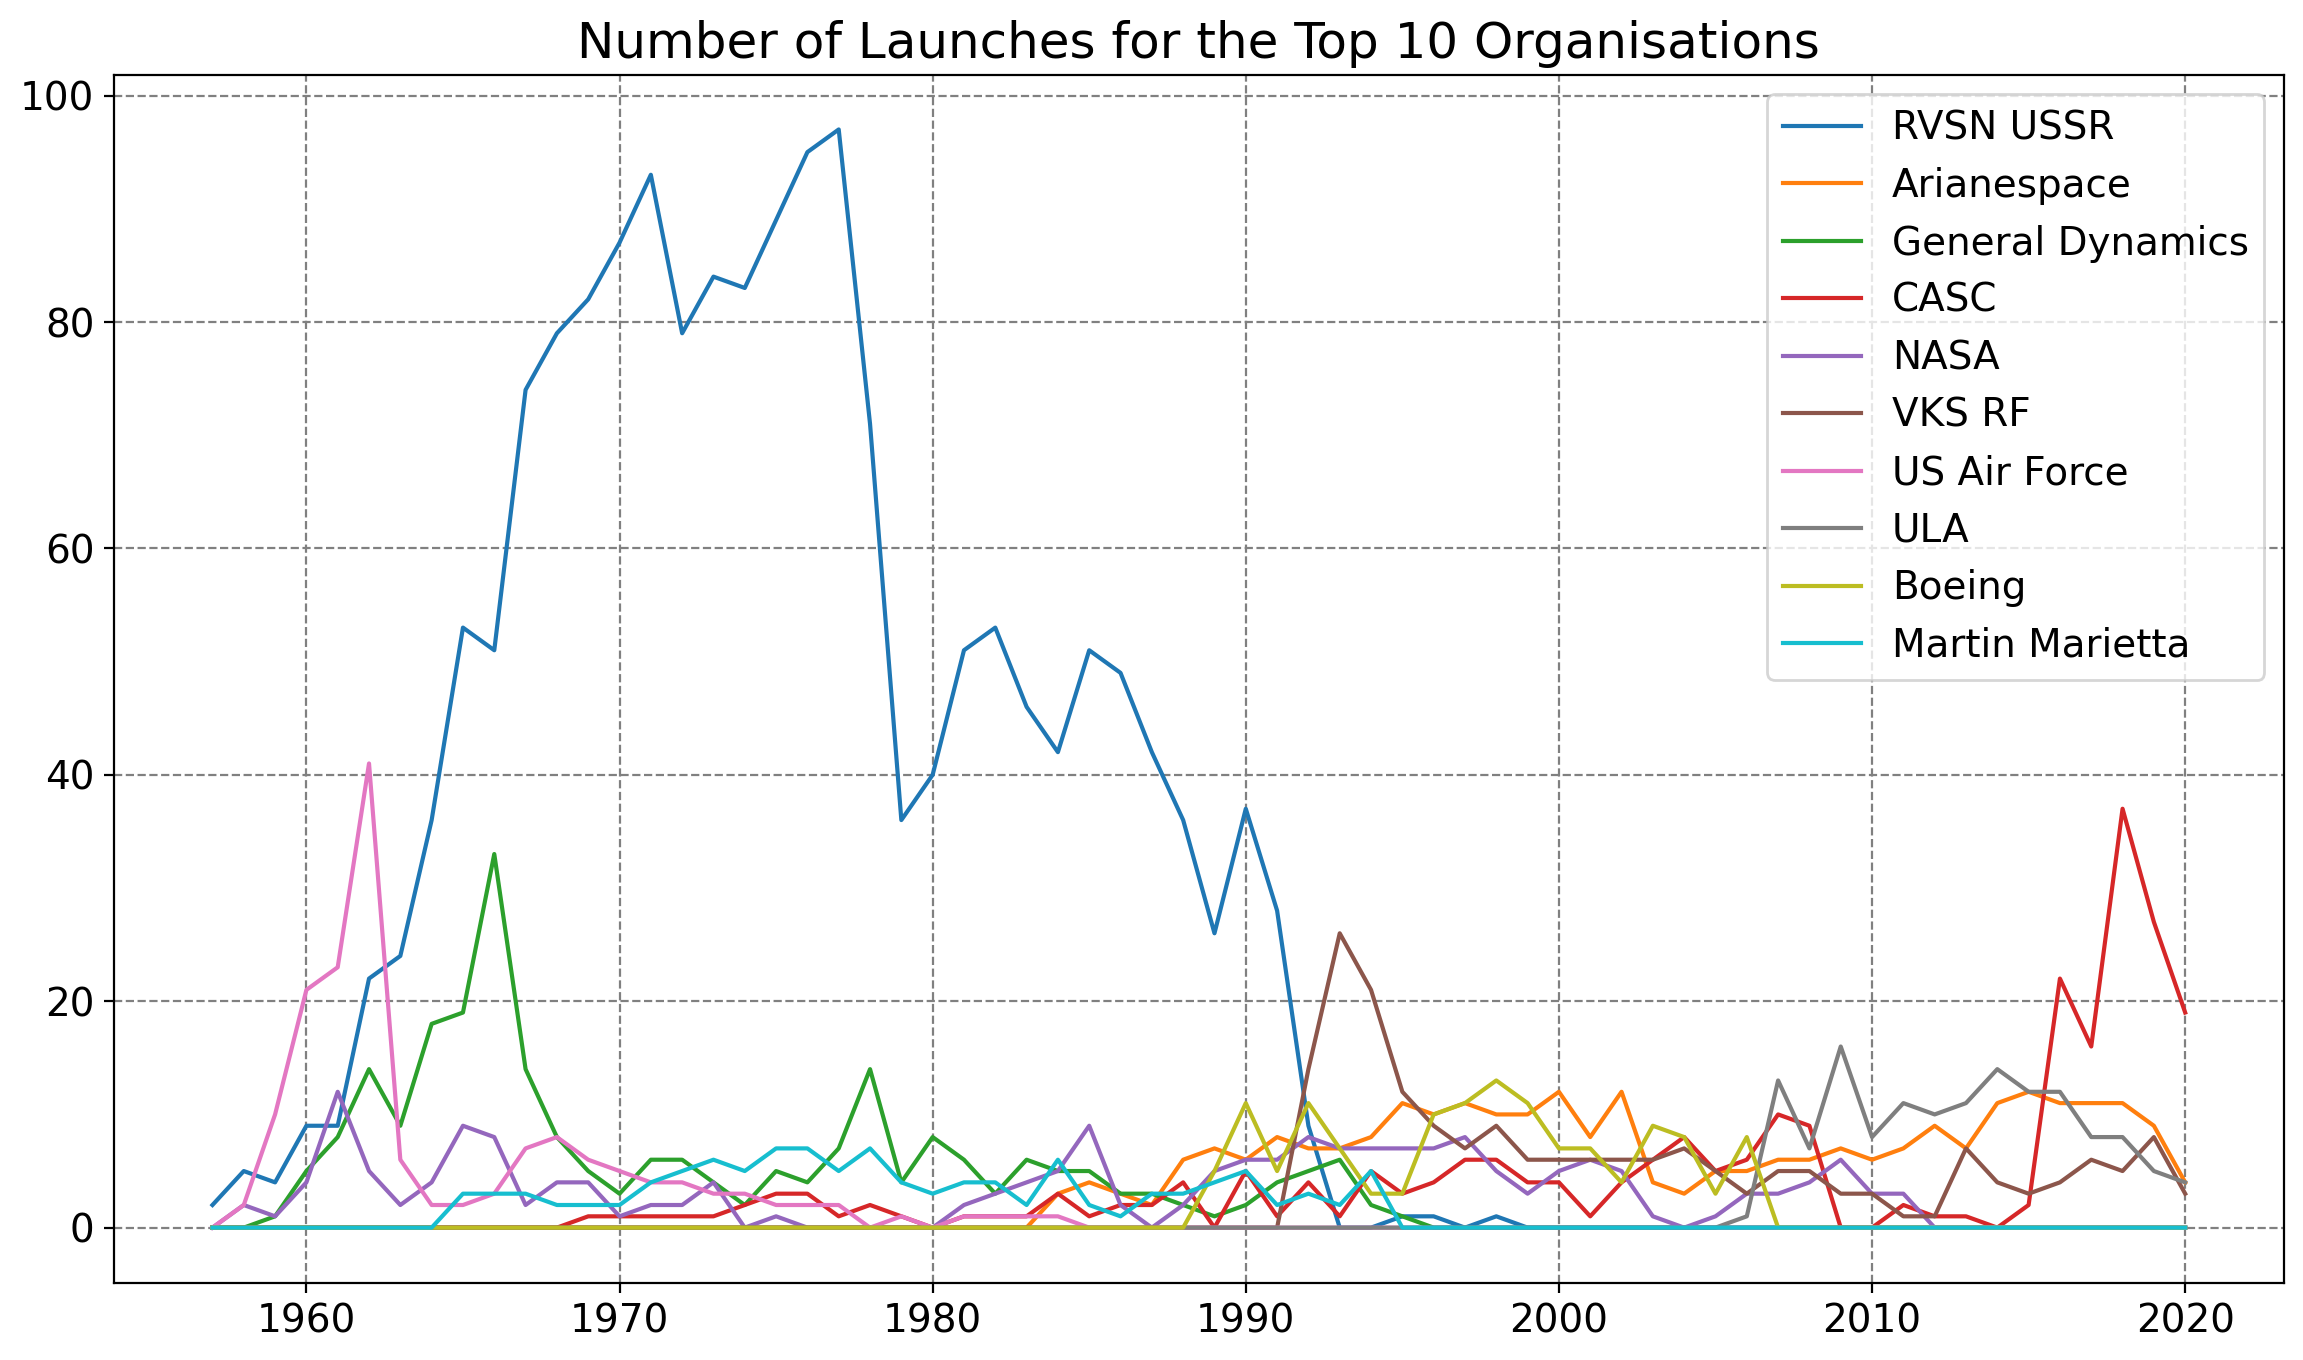

In [272]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Number of Launches for the Top 10 Organisations', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.grid(color='grey', linestyle='--')

top_orgs_plots = []
for org in top_orgs:
    df_org = df_annual_count_by_org[df_annual_count_by_org['Organisation'].isin([org])]
    plt.plot(df_org['Year'], df_org['Count'], label=org)

plt.legend(fontsize=14)
plt.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [294]:
# Filter info specific to Space Race
df_count_by_country = df[df['ISO'].isin(['USA', 'RUS', 'KZ'])]
space_race_dict = {'USA': 'USA', 'RUS': 'USSR', 'KAZ': 'USSR'}
country_list = []
for iso in df_count_by_country['ISO']:
    country_list.append(space_race_dict[iso])
df_count_by_country['Country'] = country_list
df_count_by_country = df_count_by_country[df_count_by_country['Year']<1992]

# Calculate launches by year in Space Race
df_count_by_country = df_count_by_country.groupby(['Year', 'Country']).count()[['Location']]
df_count_by_country = df_count_by_country.sort_values('Location', ascending=False)
df_count_by_country = df_count_by_country[['Location']].rename(columns={'Location':'Count'})
df_count_by_country = df_count_by_country.reset_index()

# Fill in missing rows
df_count_by_country = df_count_by_country.complete('Country', 'Year')
df_count_by_country = df_count_by_country.fillna(0)
df_count_by_country

/Users/mymac/PycharmProjects/100DaysOfCode/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Year Country  Count
0   1977    USSR  72.00
1   1973    USSR  67.00
2   1976    USSR  66.00
3   1975    USSR  66.00
4   1971    USSR  62.00
..   ...     ...    ...
65  1958     USA  23.00
66  1989     USA  16.00
67  1963     USA  17.00
68  1959     USA  16.00
69  1957     USA   1.00

[70 rows x 3 columns]

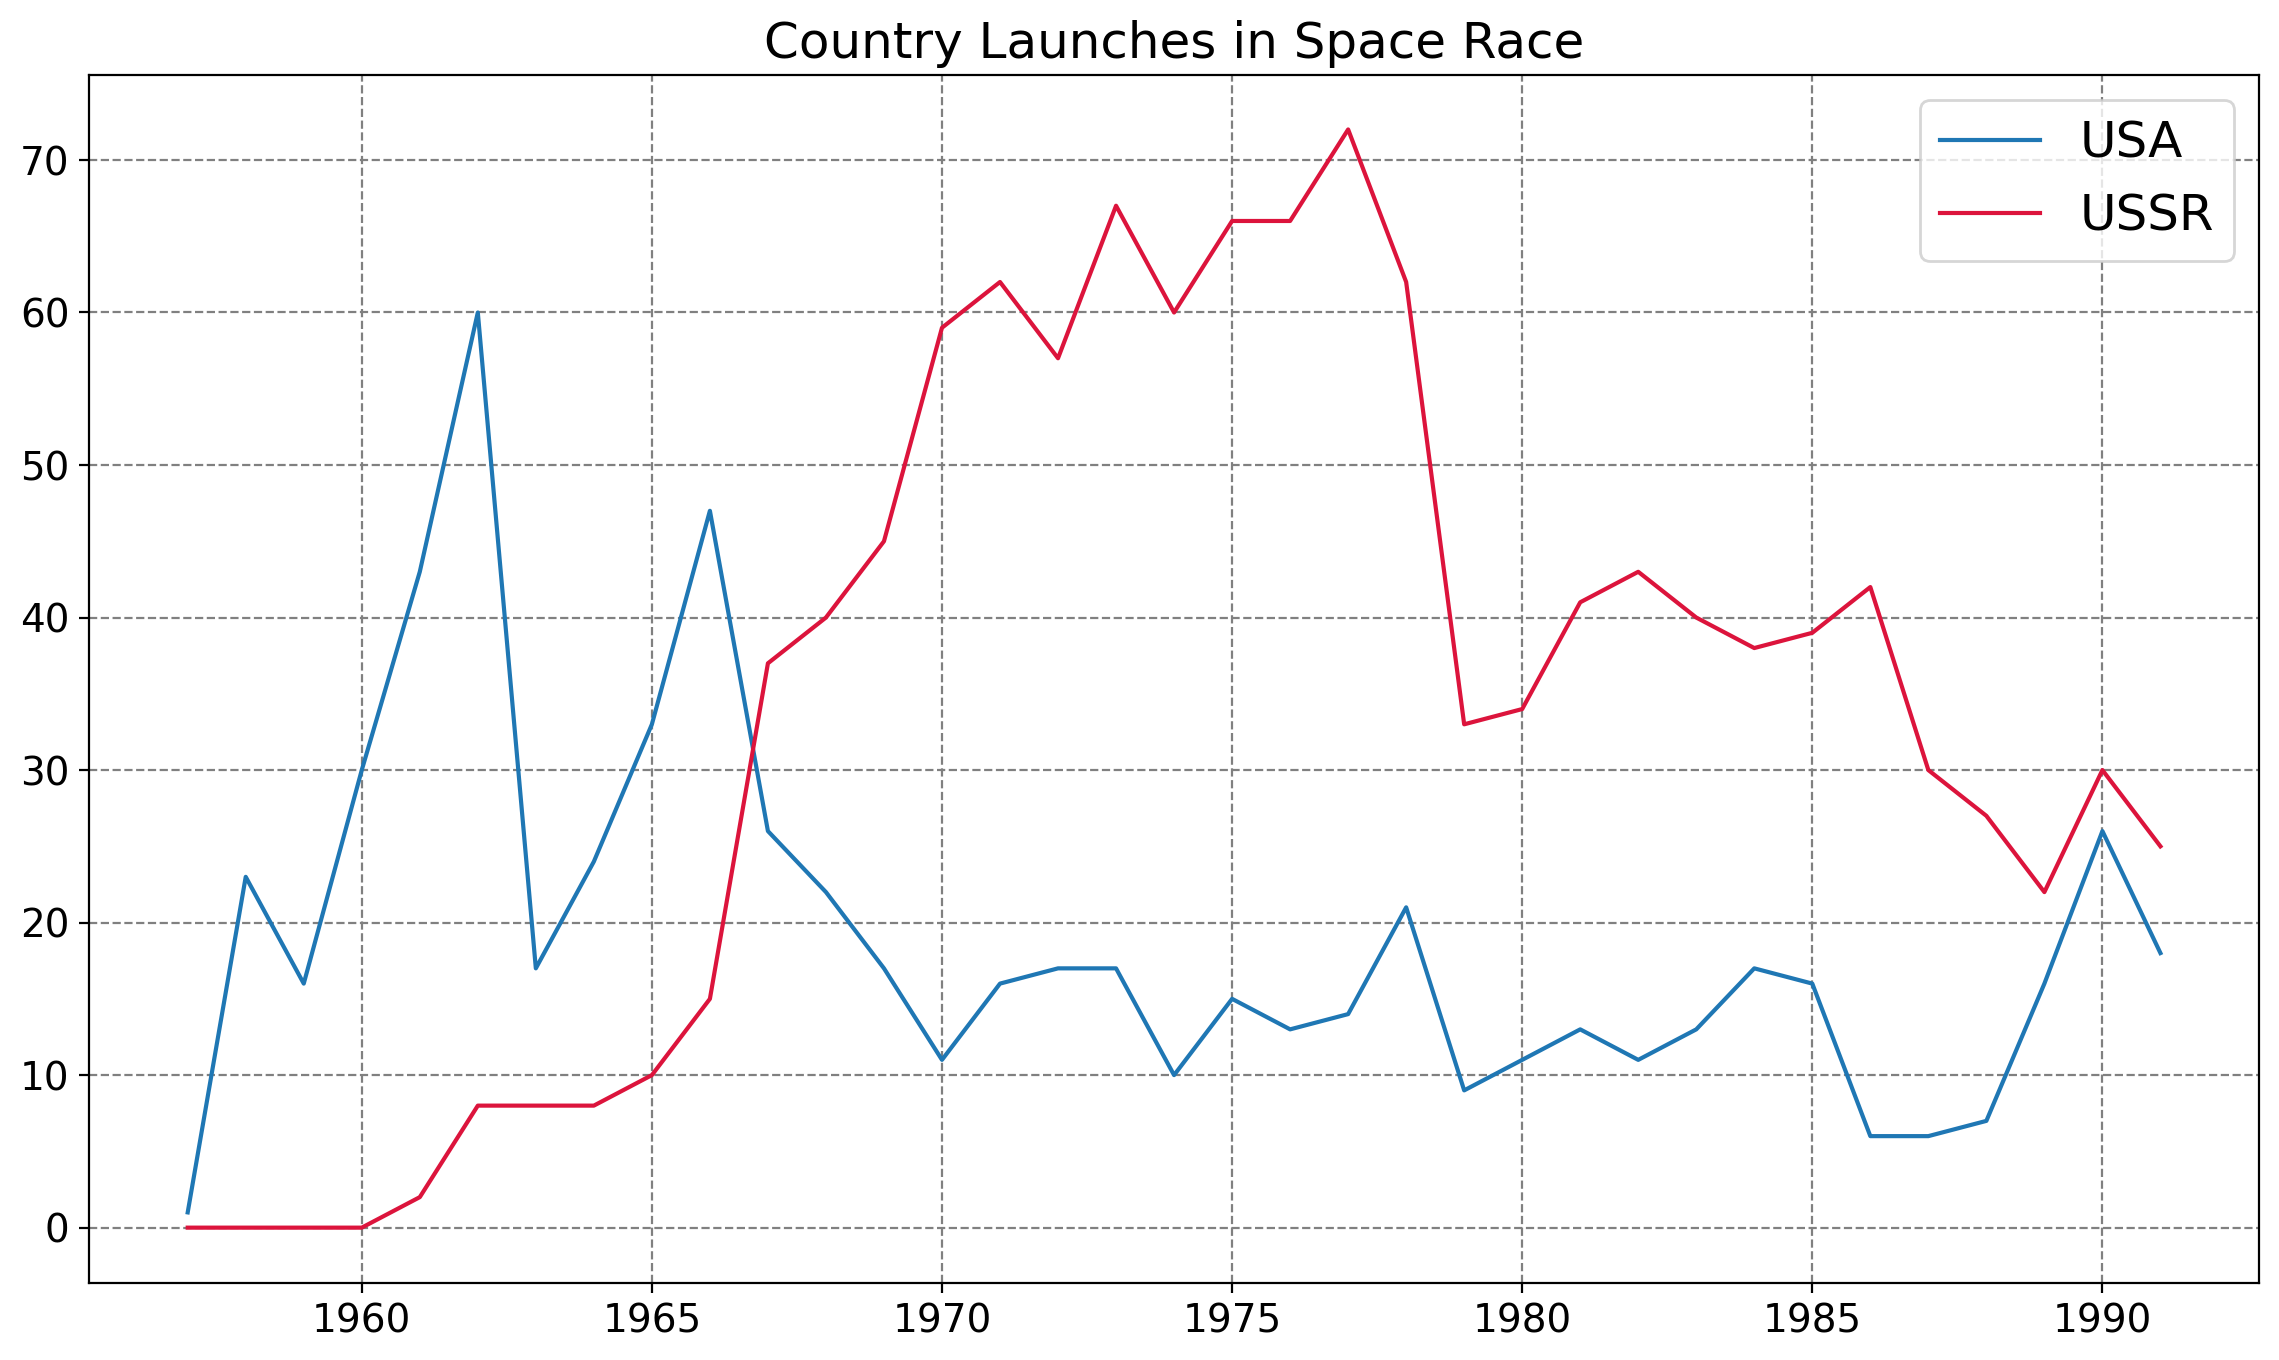

In [297]:
df_USA = df_count_by_country[df_count_by_country['Country'].isin(['USA'])]
df_USA = df_USA.sort_values('Year', ascending=True)
df_USSR = df_count_by_country[df_count_by_country['Country'].isin(['USSR'])]
df_USSR = df_USSR.sort_values('Year', ascending=True)

plt.figure(figsize=(14,8), dpi=200)
plt.title('Country Launches in Space Race', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.grid(color='grey', linestyle='--')

USA_line, = plt.plot(df_USA['Year'],
                    df_USA['Count'],
                    label='USA')

USSR_line, = plt.plot(df_USSR['Year'],
                    df_USSR['Count'],
                    color='crimson',
                    label='USSR')

plt.legend(handles=[USA_line, USSR_line], fontsize=18)

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

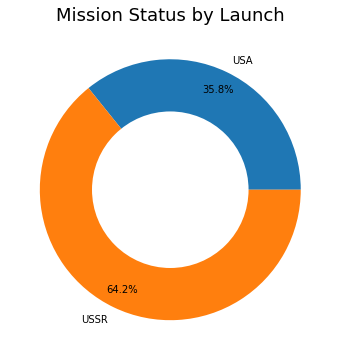

In [310]:
df_total_count_by_country = df_count_by_country.groupby('Country').sum()
df_total_count_by_country = df_total_count_by_country[['Count']]
df_total_count_by_country
# df_total_count_by_country = df_total_count_by_country.set_index('Country')
#
plt.figure(figsize=(6, 6))
plt.pie(df_total_count_by_country['Count'], labels=df_total_count_by_country.index, autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.60, fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Mission Status by Launch', fontsize=18)
plt.show()

## Chart the Total Number of Mission Failures Year on Year.

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 